In [1]:
# Importing Libraries that are important for the research

import pandas as pd    # for data processing
import numpy as np     # for linear algebra
import matplotlib.pyplot as plt #for plots and graphs
import seaborn as sns #for crisp graphs or more beautiful graphs
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# First we have to read our data

data = pd.read_csv('data.csv')

In [3]:
# The first five lines from out dataset

data.head()

diagnosis     x1     x2      x3      x4    x5    x6    x7    x8    x9  ...  \
0         M  17.99  10.38  122.80  1001.0  0.12  0.28  0.30  0.15  0.24  ...   
1         M  20.57  17.77  132.90  1326.0  0.08  0.08  0.09  0.07  0.18  ...   
2         M  19.69  21.25  130.00  1203.0  0.11  0.16  0.20  0.13  0.21  ...   
3         M  11.42  20.38   77.58   386.1  0.14  0.28  0.24  0.11  0.26  ...   
4         M  20.29  14.34  135.10  1297.0  0.10  0.13  0.20  0.10  0.18  ...   

     x21    x22     x23     x24   x25   x26   x27   x28   x29   x30  
0  25.38  17.33  184.60  2019.0  0.16  0.67  0.71  0.27  0.46  0.12  
1  24.99  23.41  158.80  1956.0  0.12  0.19  0.24  0.19  0.28  0.09  
2  23.57  25.53  152.50  1709.0  0.14  0.42  0.45  0.24  0.36  0.09  
3  14.91  26.50   98.87   567.7  0.21  0.87  0.69  0.26  0.66  0.17  
4  22.54  16.67  152.20  1575.0  0.14  0.21  0.40  0.16  0.24  0.08  

[5 rows x 31 columns]

In [4]:
# To also get more information on the data,the "info()" function 
# is also important as it tells how manay rows and columns are contained
# in the dataset as well as the gives information on missing data and the dataset types of the variables.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   diagnosis  569 non-null    object 
 1   x1         569 non-null    float64
 2   x2         569 non-null    float64
 3   x3         569 non-null    float64
 4   x4         569 non-null    float64
 5   x5         569 non-null    float64
 6   x6         569 non-null    float64
 7   x7         569 non-null    float64
 8   x8         569 non-null    float64
 9   x9         569 non-null    float64
 10  x10        569 non-null    float64
 11  x11        569 non-null    float64
 12  x12        569 non-null    float64
 13  x13        569 non-null    float64
 14  x14        569 non-null    float64
 15  x15        569 non-null    float64
 16  x16        569 non-null    float64
 17  x17        569 non-null    float64
 18  x18        569 non-null    float64
 19  x19        569 non-null    float64
 20  x20       

In [5]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
data["diagnosis"] = data["diagnosis"].replace({"B": 0, "M": 1})

In [7]:
data["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [8]:
data.isnull().sum()

diagnosis    0
x1           0
x2           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
x20          0
x21          0
x22          0
x23          0
x24          0
x25          0
x26          0
x27          0
x28          0
x29          0
x30          0
dtype: int64

In [9]:
#data = data.drop(["id", "Unnamed: 32"], axis=1)

In [10]:
data.describe()

diagnosis          x1          x2          x3           x4  \
count  569.000000  569.000000  569.000000  569.000000   569.000000   
mean     0.372583   14.127381   19.289649   91.969033   654.889104   
std      0.483918    3.523928    4.301036   24.298981   351.914129   
min      0.000000    6.980000    9.710000   43.790000   143.500000   
25%      0.000000   11.700000   16.170000   75.170000   420.300000   
50%      0.000000   13.370000   18.840000   86.240000   551.100000   
75%      1.000000   15.780000   21.800000  104.100000   782.700000   
max      1.000000   28.110000   39.280000  188.500000  2501.000000   

               x5          x6          x7          x8          x9  ...  \
count  569.000000  569.000000  569.000000  569.000000  569.000000  ...   
mean     0.096239    0.104464    0.088840    0.048981    0.181125  ...   
std      0.014496    0.052989    0.079806    0.038975    0.027504  ...   
min      0.050000    0.020000    0.000000    0.000000    0.110000  ...   
25%      0.090000    0.060000    0.030000    0.020000    0.160000  ...   
50%      0.100000    0.090000    0.060000    0.030000    0.180000  ...   
75%      0.110000    0.130000    0.130000    0.070000    0.200000  ...   
max      0.160000    0.350000    0.430000    0.200000    0.300000  ...   

              x21         x22         x23          x24         x25  \
count  569.000000  569.000000  569.000000   569.000000  569.000000   
mean    16.269209   25.677223  107.261213   880.583128    0.132197   
std      4.833217    6.146258   33.602542   569.356993    0.023292   
min      7.930000   12.020000   50.410000   185.200000    0.070000   
25%     13.010000   21.080000   84.110000   515.300000    0.120000   
50%     14.970000   25.410000   97.660000   686.500000    0.130000   
75%     18.790000   29.720000  125.400000  1084.000000    0.150000   
max     36.040000   49.540000  251.200000  4254.000000    0.220000   

              x26         x27         x28         x29         x30  
count  569.000000  569.000000  569.000000  569.000000  569.000000  
mean     0.254253    0.272250    0.114745    0.290316    0.083989  
std      0.157357    0.208666    0.065767    0.062011    0.018185  
min      0.030000    0.000000    0.000000    0.160000    0.060000  
25%      0.150000    0.110000    0.060000    0.250000    0.070000  
50%      0.210000    0.230000    0.100000    0.280000    0.080000  
75%      0.340000    0.380000    0.160000    0.320000    0.090000  
max      1.060000    1.250000    0.290000    0.660000    0.210000  

[8 rows x 31 columns]

In [11]:
sns.pairplot(data);

In [12]:
data.corr()

diagnosis        x1        x2        x3        x4        x5  \
diagnosis   1.000000  0.730034  0.415185  0.742636  0.708984  0.330624   
x1          0.730034  1.000000  0.323786  0.997856  0.987363  0.147109   
x2          0.415185  0.323786  1.000000  0.329533  0.321086 -0.040419   
x3          0.742636  0.997856  0.329533  1.000000  0.986507  0.183356   
x4          0.708984  0.987363  0.321086  0.986507  1.000000  0.151671   
x5          0.330624  0.147109 -0.040419  0.183356  0.151671  1.000000   
x6          0.597576  0.505622  0.237019  0.556485  0.498038  0.640292   
x7          0.695472  0.676972  0.300217  0.716393  0.686202  0.501935   
x8          0.774410  0.821648  0.287618  0.849875  0.822500  0.528881   
x9          0.332218  0.151055  0.066582  0.186177  0.154270  0.544946   
x10        -0.027269 -0.289995 -0.080337 -0.245096 -0.260436  0.556840   
x11         0.567459  0.678511  0.275906  0.691181  0.732032  0.277660   
x12        -0.008298 -0.097242  0.386274 -0.086694 -0.066173  0.058768   
x13         0.556090  0.674119  0.281638  0.693074  0.726573  0.272226   
x14         0.548236  0.735873  0.259845  0.744983  0.800086  0.222595   
x15        -0.012117 -0.167454  0.019777 -0.149510 -0.130192  0.268150   
x16         0.288713  0.204341  0.192029  0.248683  0.211126  0.313043   
x17         0.255041  0.194148  0.145536  0.228160  0.206659  0.249132   
x18         0.329287  0.325043  0.153373  0.353151  0.322610  0.282948   
x19        -0.025127 -0.117232 -0.017239 -0.093748 -0.084347  0.216286   
x20         0.091669 -0.009520  0.079210  0.027147  0.002046  0.278176   
x21         0.776455  0.969541  0.352585  0.969475  0.962746  0.189988   
x22         0.456903  0.297014  0.912045  0.303038  0.287489  0.022669   
x23         0.782914  0.965140  0.358040  0.970387  0.959120  0.215574   
x24         0.733825  0.941090  0.343546  0.941550  0.959213  0.182905   
x25         0.417711  0.118379  0.076161  0.148953  0.122291  0.778512   
x26         0.590456  0.413080  0.277696  0.455398  0.389901  0.461947   
x27         0.659107  0.527126  0.299816  0.564064  0.512679  0.420481   
x28         0.791830  0.741285  0.293656  0.768255  0.719305  0.484312   
x29         0.417313  0.164291  0.105981  0.189269  0.143632  0.391479   
x30         0.322940  0.009606  0.113283  0.053337  0.007132  0.499812   

                 x6        x7        x8        x9  ...       x21       x22  \
diagnosis  0.597576  0.695472  0.774410  0.332218  ...  0.776455  0.456903   
x1         0.505622  0.676972  0.821648  0.151055  ...  0.969541  0.297014   
x2         0.237019  0.300217  0.287618  0.066582  ...  0.352585  0.912045   
x3         0.556485  0.716393  0.849875  0.186177  ...  0.969475  0.303038   
x4         0.498038  0.686202  0.822500  0.154270  ...  0.962746  0.287489   
x5         0.640292  0.501935  0.528881  0.544946  ...  0.189988  0.022669   
x6         1.000000  0.883906  0.829022  0.602963  ...  0.534940  0.247564   
x7         0.883906  1.000000  0.918606  0.500529  ...  0.688607  0.298673   
x8         0.829022  0.918606  1.000000  0.460606  ...  0.828402  0.286828   
x9         0.602963  0.500529  0.460606  1.000000  ...  0.189390  0.084017   
x10        0.506156  0.301337  0.142307  0.411762  ... -0.242120 -0.051211   
x11        0.497329  0.631199  0.699709  0.303226  ...  0.714796  0.195020   
x12        0.044814  0.075963  0.025187  0.124800  ... -0.111638  0.408922   
x13        0.548702  0.659862  0.712094  0.312445  ...  0.697153  0.200306   
x14        0.456052  0.617247  0.690641  0.225294  ...  0.757375  0.196497   
x15        0.133392  0.110670  0.051658  0.153481  ... -0.152306 -0.008034   
x16        0.729164  0.665410  0.490719  0.411930  ...  0.202031  0.146121   
x17        0.571996  0.688908  0.441037  0.337259  ...  0.187374  0.102586   
x18        0.558232  0.583051  0.522044  0.312193  ...  0.307289  0.079999   
x19        0.236474  0.178931  0.098510  0.446296  ... -0.142186 -0.094773   
x20 

# Regression Analysis

In [13]:
X = data.drop(["diagnosis"], axis=1)
y = data["diagnosis"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
SEED = 42

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [18]:

lm.fit(X,y)

LinearRegression()

In [19]:
lm.intercept_

-2.019773734858454

In [20]:
print("The regression coefficient is =", lm.coef_)

The regression coefficient is = [-1.10442924e-01  1.28445856e-02  1.15466197e-02  1.21918905e-04
 -2.27608689e+00 -3.21167109e+00  8.42034592e-01  3.02703825e+00
  3.40365911e-01 -1.27048357e-01  4.56276627e-01  2.22987808e-02
 -8.64450873e-03 -1.23726817e-03  3.42000514e+00  9.82729960e-01
 -2.55730162e+00  2.16061763e+00  1.23940100e+00 -2.86192294e+00
  1.66253722e-01  1.16666576e-04 -1.94617882e-03 -8.93624845e-04
  2.64830313e+00 -1.85430517e-01  3.73217272e-01  1.00544890e+00
  4.75552235e-01  3.77383839e+00]


In [21]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

score = calc(lm.coef_, lm.intercept_, 9.5)
print(score)

[ -3.06898152  -1.89775017  -1.91008085  -2.01861551 -23.64259914
 -32.53064913   5.97955489  26.73708966   1.21370242  -3.22673312
   2.31485422  -1.80793532  -2.10189657  -2.03152778  30.47027514
   7.31616088 -26.31413915  18.50609375   9.75453572 -29.20804169
  -0.44036338  -2.0186654   -2.03826243  -2.02826317  23.13910601
  -3.78136365   1.52579035   7.53199086   2.4979725   33.83169097]


In [22]:
y_pred = lm.predict(X_test)

df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze(), 'Difference':y_test-y_pred.round(2)})
print(df_preds.head(20))


     Actual  Predicted  Difference
204       0   0.380580       -0.38
70        1   0.888975        0.11
131       1   0.734639        0.27
431       0  -0.110640        0.11
540       0  -0.178998        0.18
567       1   1.525078       -0.53
369       1   1.144130       -0.14
29        1   0.592025        0.41
81        0   0.605506       -0.61
477       0   0.017372       -0.02
457       0   0.230439       -0.23
167       1   0.680815        0.32
165       0   0.100161       -0.10
329       1   0.568362        0.43
527       0   0.101604       -0.10
83        1   0.895548        0.10
511       0   0.123261       -0.12
556       0  -0.213115        0.21
101       0  -0.444801        0.44
535       1   0.981567        0.02


In [23]:

from sklearn.metrics import r2_score
Accuracy = r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 77.58


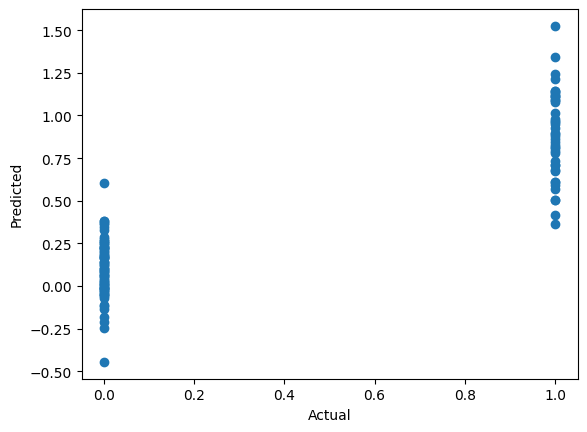

In [24]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');

plt.ylabel('Predicted');

In [25]:
MSE = np.square(np.subtract(y_test,y_pred)).mean() 

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.22947412435617365


In [26]:
from sklearn.metrics import (confusion_matrix, roc_curve, classification_report, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score)


In [27]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 

Model Accuracy: 0.95
Model Precision: 0.91
Model Recall: 0.95
Model F1-Score: 0.93
              precision    recall  f1-score   support

           M       0.97      0.94      0.96        71
           B       0.91      0.95      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114
 



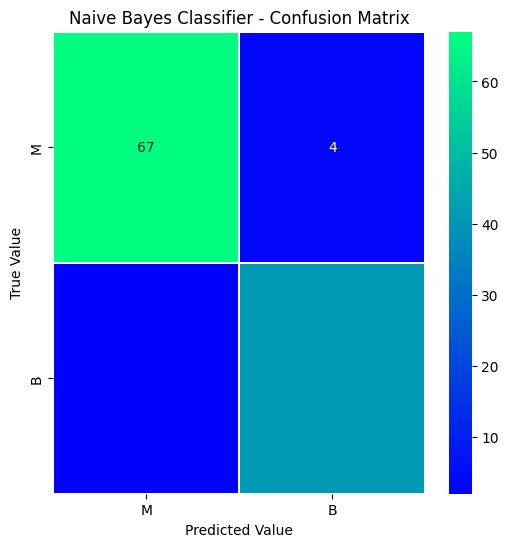

In [28]:
from sklearn.linear_model import Perceptron

NB = Perceptron()
NB.fit(X_train,y_train)
Y_pred2 = NB.predict(X_test)
conf_matrix_nb = confusion_matrix(y_test, Y_pred2)

print("Model Accuracy:", round(accuracy_score(y_test, Y_pred2),2))
print("Model Precision:", round(precision_score(y_test, Y_pred2),2))
print("Model Recall:", round(recall_score(y_test, Y_pred2),2))
print("Model F1-Score:", round(f1_score(y_test, Y_pred2),2))

conf_matrix2 = confusion_matrix(y_test, Y_pred2)
plt.figure(figsize=(6, 6))
labels= ['M', 'B'] 

sns.heatmap(pd.DataFrame(conf_matrix2),annot=True, fmt='d',linewidths= 0.05 ,cmap='winter',
            xticklabels= labels, yticklabels= labels)

print(classification_report(y_test,Y_pred2,target_names=labels) , '\n')

plt.title('Naive Bayes Classifier - Confusion Matrix')
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()

In [29]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': Y_pred2.squeeze(), 'Difference':y_test-Y_pred2.round(2)})
print(df_preds.head(20))


     Actual  Predicted  Difference
204       0          1          -1
70        1          1           0
131       1          1           0
431       0          0           0
540       0          0           0
567       1          1           0
369       1          1           0
29        1          1           0
81        0          0           0
477       0          0           0
457       0          0           0
167       1          1           0
165       0          0           0
329       1          1           0
527       0          0           0
83        1          1           0
511       0          0           0
556       0          0           0
101       0          0           0
535       1          1           0


In [30]:
from sklearn.metrics import r2_score
Accuracy = r2_score(y_test,Y_pred2)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 77.60


In [31]:
MSE = np.square(np.subtract(y_test,Y_pred2)).mean() 

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.22941573387056177
